# Decision Tree

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams 

from sklearn.tree import DecisionTreeClassifier as dtc 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

rcParams['figure.figsize'] = (10, 8)

In [3]:
df = pd.read_csv('drug.csv')
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [4]:

for i in df.Sex.values:
    if i  == 'M':
        df.Sex.replace(i, 0, inplace = True)
    else:
        df.Sex.replace(i, 1, inplace = True)

for i in df.BP.values:
    if i == 'LOW':
        df.BP.replace(i, 0, inplace = True)
    elif i == 'NORMAL':
        df.BP.replace(i, 1, inplace = True)
    elif i == 'HIGH':
        df.BP.replace(i, 2, inplace = True)

for i in df.Cholesterol.values:
    if i == 'LOW':
        df.Cholesterol.replace(i, 0, inplace = True)
    else:
        df.Cholesterol.replace(i, 1, inplace = True)

print(df)

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    1   2            1   25.355  drugY
1     47    1   0            1   13.093  drugC
2     47    1   0            1   10.114  drugC
3     28    1   1            1    7.798  drugX
4     61    1   0            1   18.043  drugY
..   ...  ...  ..          ...      ...    ...
195   56    1   0            1   11.567  drugC
196   16    1   0            1   12.006  drugC
197   52    1   1            1    9.894  drugX
198   23    1   1            1   14.020  drugX
199   40    1   0            1   11.349  drugX

[200 rows x 6 columns]


In [6]:

X_var = df[['Sex', 'BP', 'Age', 'Cholesterol', 'Na_to_K']].values # independent variable
y_var = df['Drug'].values # dependent variable

print('X variable samples : {}'.format(X_var[:5]))
print('Y variable samples : {}'.format(y_var[:5]))

X variable samples : [[ 1.     2.    23.     1.    25.355]
 [ 1.     0.    47.     1.    13.093]
 [ 1.     0.    47.     1.    10.114]
 [ 1.     1.    28.     1.     7.798]
 [ 1.     0.    61.     1.    18.043]]
Y variable samples : ['drugY' 'drugC' 'drugC' 'drugX' 'drugY']


In [7]:

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

In [8]:
model = dtc(criterion = 'gini', max_depth = 4)
model.fit(X_train, y_train)

pred_model = model.predict(X_test)


In [9]:
print('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)))

Accuracy of the model is 88%


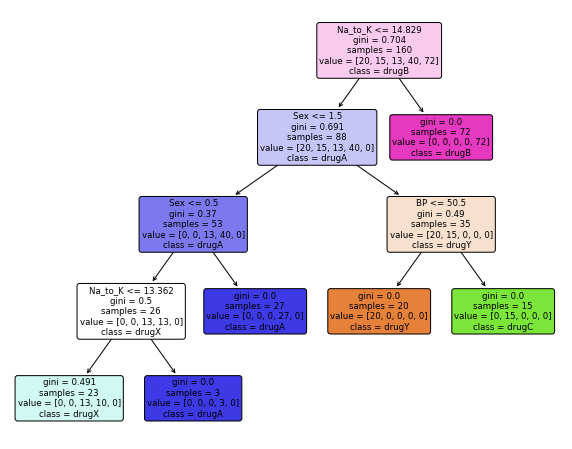

In [16]:
feature_names = df.columns[:5]
target_names = df['Drug'].unique().tolist()

plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)
plt.show()